#### 1. Loading and Understanding dataset
    * Features Describing
    * Feature Distribution
    
#### 2. EDA and Data Inspection
    * Ploting missing data using missingno graph
    * Removing N
    * Droping column more than 85%
    * Impute the null values 
    * Checking the  outliers 
    * Removing Outliers
    * Data Visualization (Pairplot/Correlation/Univariate/Multivariabte/Jointplot)
    * Multi Collinearity (remvoinf features which have high correlation)

#### 3. Data Preparation
    * Converting categorical data into numercal data
    * Creating Dummies variable

#### 4. Train-Test Split
    * Scale the data using StandardScaler
    * Split the data into train test split

***
### Building Model and Evaluation 

#### 5. Recursive feature elimination (RFE)
    * To select the 50 best independent features

#### 6. Ridge regression 
    * Finding the highly correlated features(Hypertunning)
    * Negative Mean Absolute Error and alpha

#### 7. Lasso regression
    * Selecting best feature for model fitting
    * Also using for feature Selection
    
#### 8. Conclusion

In [1]:
# Imports the libraries 
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1. Loading and Understanding dataset

In [2]:
# Loading the given dataset
df = pd.read_csv("train.csv", encoding = 'utf-8')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

* Features Describing

In [4]:
# features informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# features distribution (standard deviation)
df.std()

Id                 421.610009
MSSubClass          42.300571
LotFrontage         24.284752
LotArea           9981.264932
OverallQual          1.382997
OverallCond          1.112799
YearBuilt           30.202904
YearRemodAdd        20.645407
MasVnrArea         181.066207
BsmtFinSF1         456.098091
BsmtFinSF2         161.319273
BsmtUnfSF          441.866955
TotalBsmtSF        438.705324
1stFlrSF           386.587738
2ndFlrSF           436.528436
LowQualFinSF        48.623081
GrLivArea          525.480383
BsmtFullBath         0.518911
BsmtHalfBath         0.238753
FullBath             0.550916
HalfBath             0.502885
BedroomAbvGr         0.815778
KitchenAbvGr         0.220338
TotRmsAbvGrd         1.625393
Fireplaces           0.644666
GarageYrBlt         24.689725
GarageCars           0.747315
GarageArea         213.804841
WoodDeckSF         125.338794
OpenPorchSF         66.256028
EnclosedPorch       61.119149
3SsnPorch           29.317331
ScreenPorch         55.757415
PoolArea  

In [6]:
# total stats of each variable 
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Removing the duplicate entries
sum(df.duplicated(subset = 'Id')) == 0

True

* Ploting missing data using missingno graph

<AxesSubplot:>

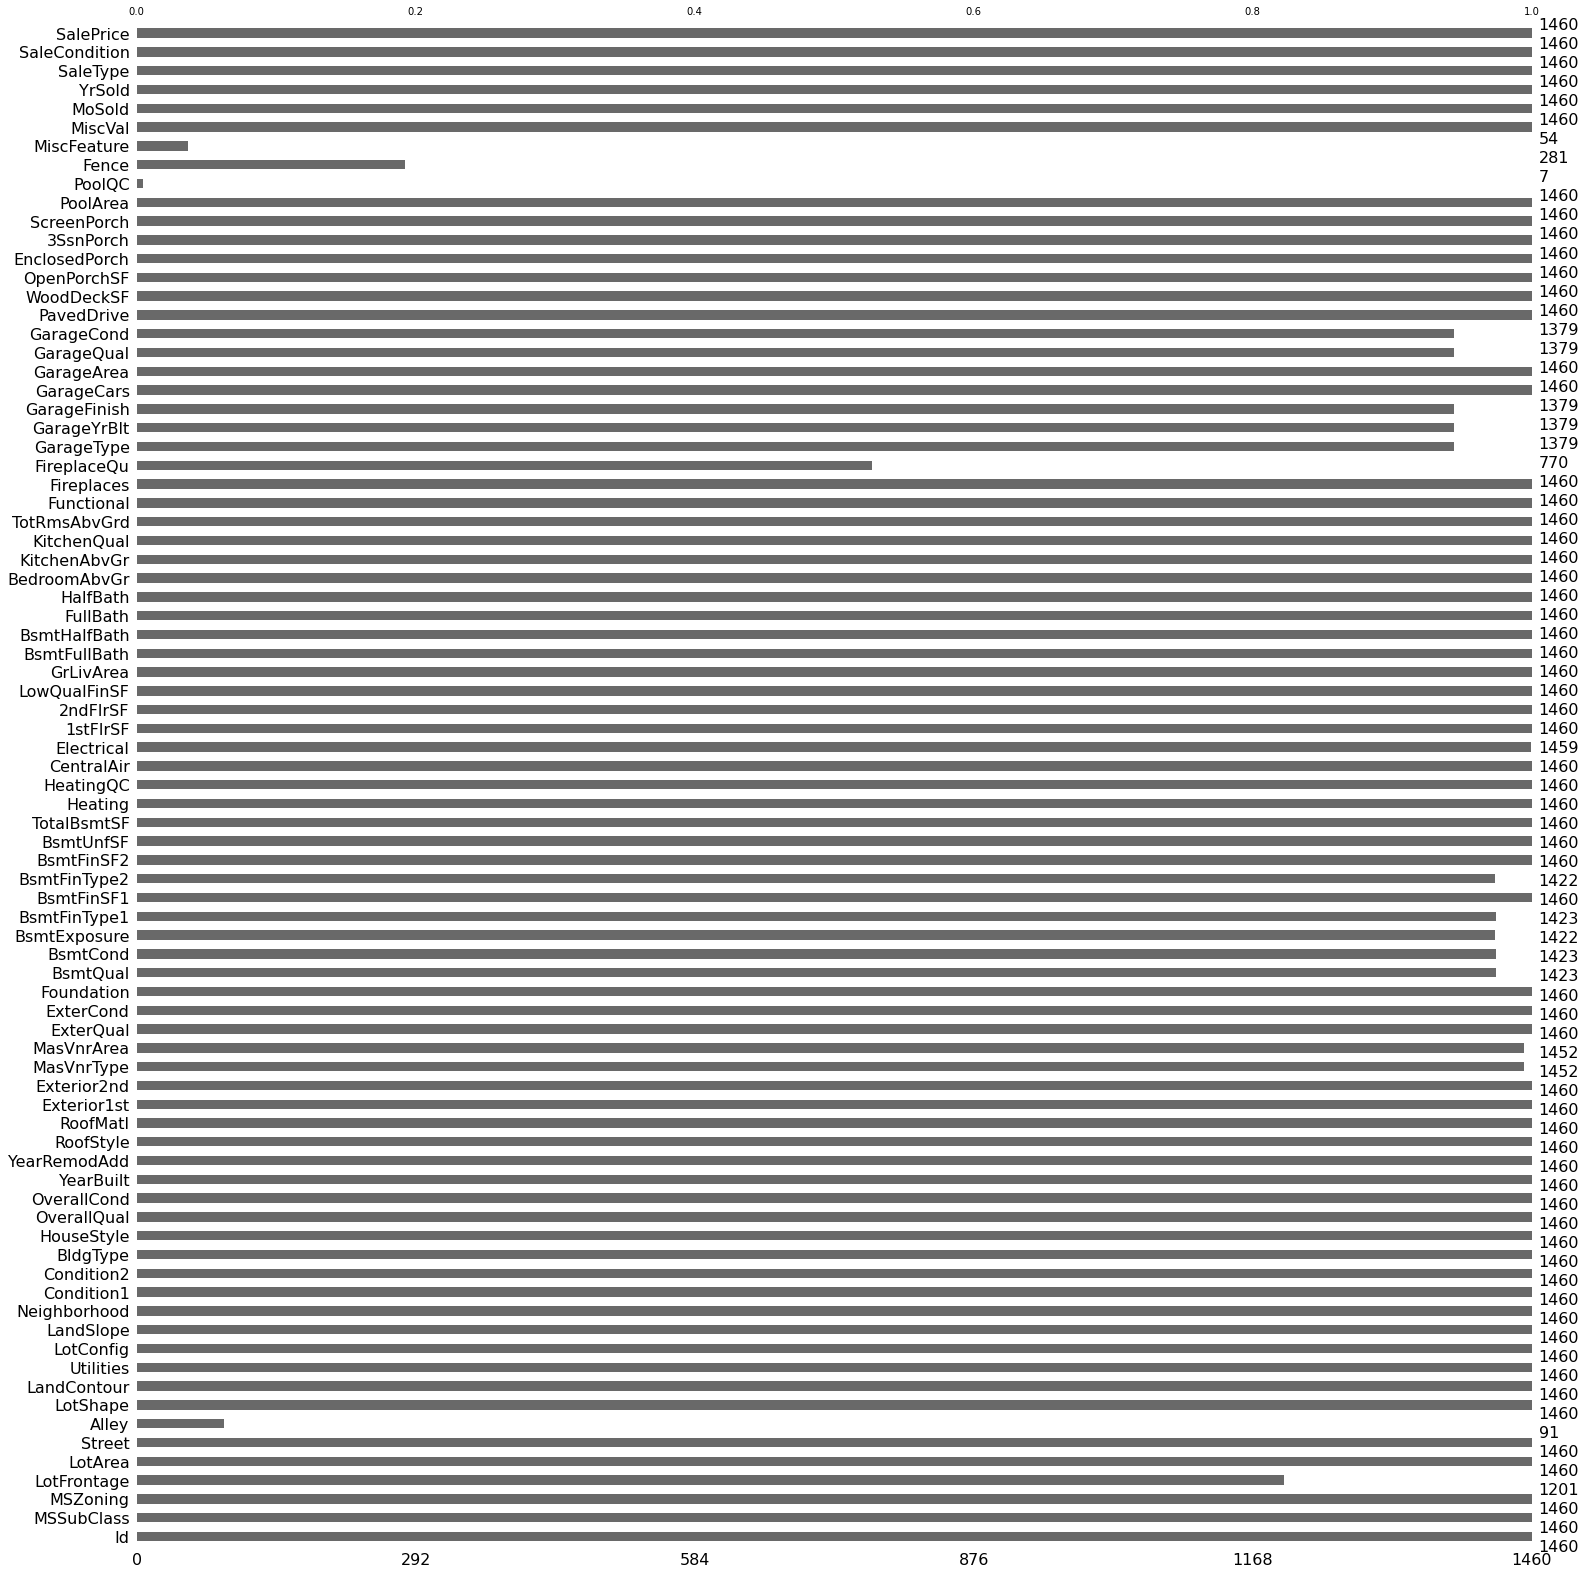

In [8]:
# checking the null values in dataframe using bar plot
msno.bar(df)

In [9]:
# Replace NA with None in dataset:  
cols = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
        'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical']

for col in cols:    
    df[col]=df[col].fillna('None')

* Remove categorical attributes that have more than 85% data associated to one value. (We will remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed to one value)

In [10]:
# Drop the following columns that have more than 85% values associated to a specific value

column = []
categorical_columns = df.select_dtypes(include=['object'])
for col in (categorical_columns):
    if(df[col].value_counts().max() >= 1241):
        column.append(col)

# Remove the columns with skewed data
df.drop(column, axis = 1, inplace = True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [11]:
# before (1460, 81) and now 
df.shape

(1460, 60)

* Removing null values in Numerical attributes

In [12]:
# check the null values in the numerical data

df.select_dtypes(include=['int64','float']).isnull().sum()[df.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [13]:
# Will check these columns one by one
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [14]:
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [15]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

* Impute the null values 

In [16]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns

df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, df['MasVnrArea'].median())

In [17]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

In [18]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
df['IsRemodelled'] = df.apply(checkForRemodel, axis=1)
df.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [19]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df['BuiltOrRemodelAge'] = df.apply(getBuiltOrRemodelAge, axis=1)
df.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [20]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1

df['OldOrNewGarage'] = df['GarageYrBlt'].apply(getGarageConstructionPeriod)
df.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


In [21]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# would only be using the derived columns for further analysis

df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [22]:
# Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    numerical_columns = df.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
df.drop(columnsToBeRemoved, axis = 1, inplace = True)

df.drop(['MoSold'], axis = 1, inplace = True)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1


In [23]:
# check for percentage of null values in each column

percent_missing = round(100*(df.isnull().sum()/len(df.index)), 2)
print(percent_missing)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0


Here is no Null Values in dataset

* Checking the  outliers 

In [24]:
# Checking for outlier in the numerical columns
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


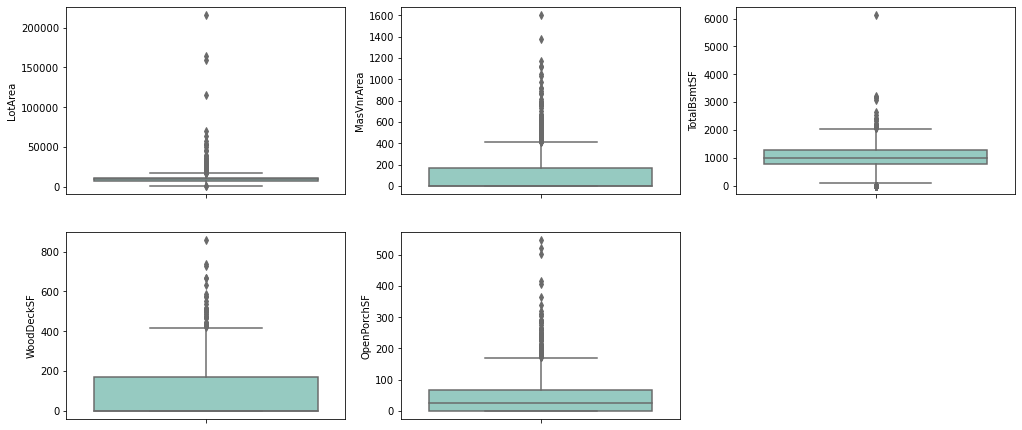

In [25]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = df)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = df)
plt.show()

* Removing Outliers

In [26]:
# Removing values beyond 98% for LotArea

nn_quartile_LotArea = df['LotArea'].quantile(0.98)
df = df[df["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = df['MasVnrArea'].quantile(0.98)
df = df[df["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = df['TotalBsmtSF'].quantile(0.99)
df = df[df["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = df['WoodDeckSF'].quantile(0.99)
df = df[df["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = df['OpenPorchSF'].quantile(0.99)
df = df[df["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [27]:
# Determine the percentage of data retained

num_data = round(100*(len(df)/1460),2)
print(num_data)

93.01


* Data Visualization (Target variable 'sale Price' vs a few select columns)

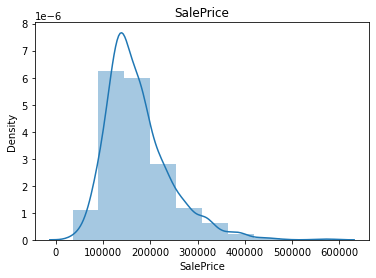

In [28]:
# Visualise the target variable -> SalePrice before transformation
plt.title('SalePrice')
sns.distplot(df['SalePrice'], bins=10)
plt.show()

* Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data

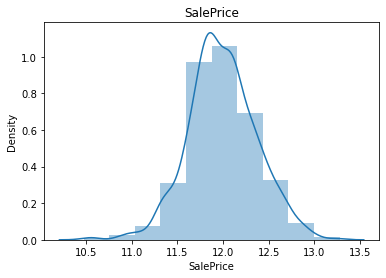

In [29]:
# Visualise the target variable -> SalePrice after transforming the sales price

df['SalePrice'] = np.log1p(df['SalePrice'])

plt.title('SalePrice')
sns.distplot(df['SalePrice'], bins=10)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'ClearCr'),
  Text(19, 0, 'NPkVill'),
  Text(20, 0, 'StoneBr'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

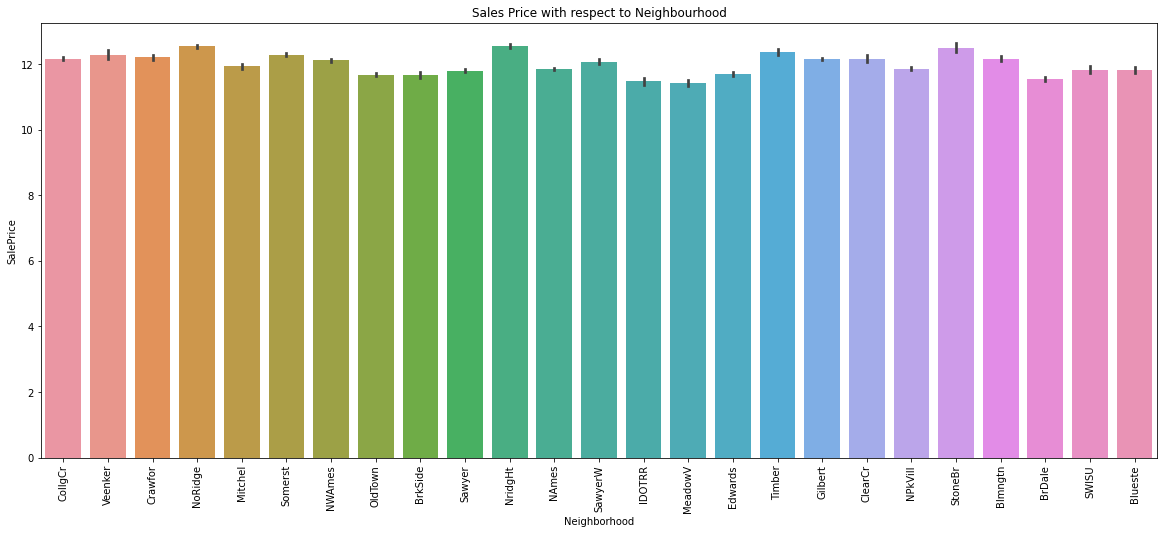

In [30]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= df)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

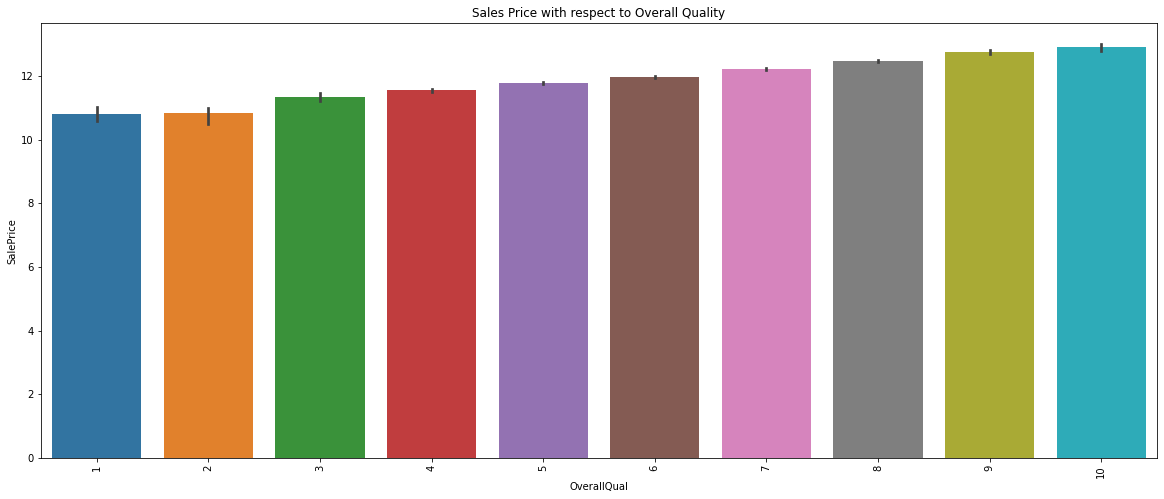

In [31]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= df)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

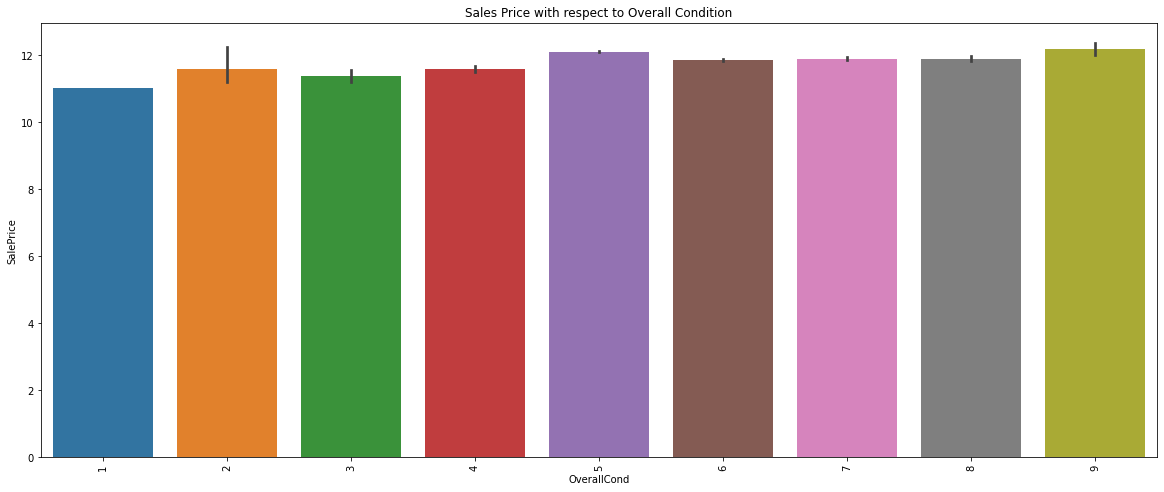

In [32]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= df)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

<Figure size 720x360 with 0 Axes>

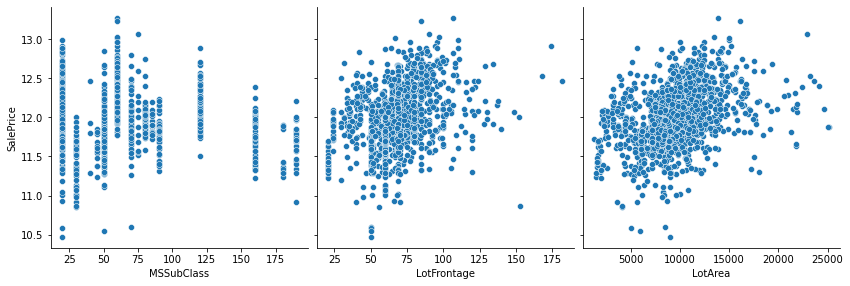

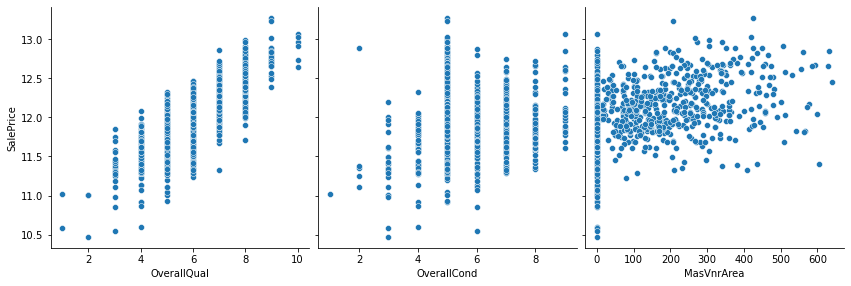

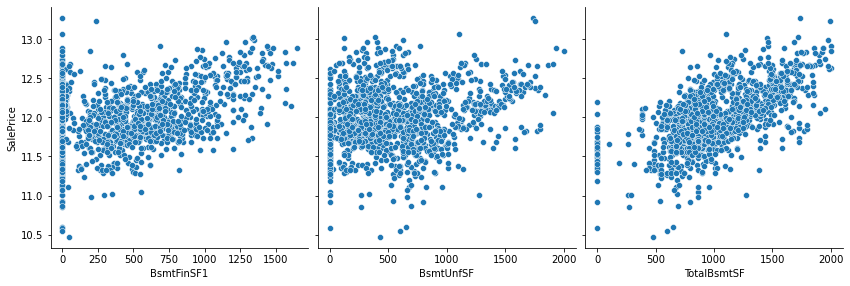

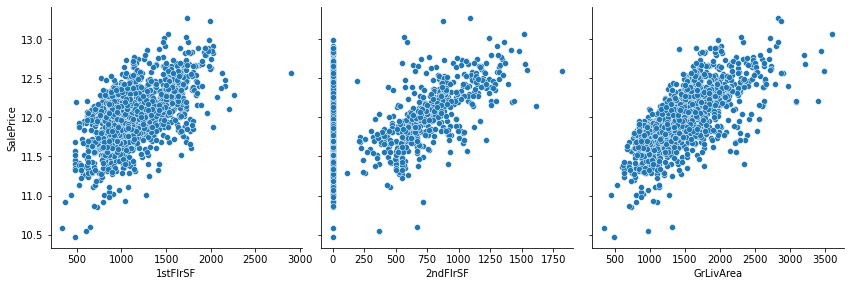

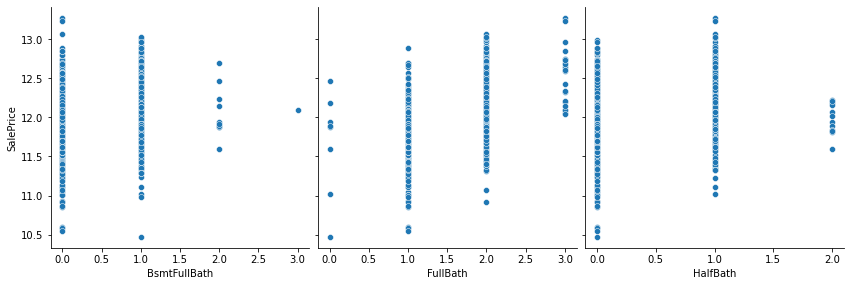

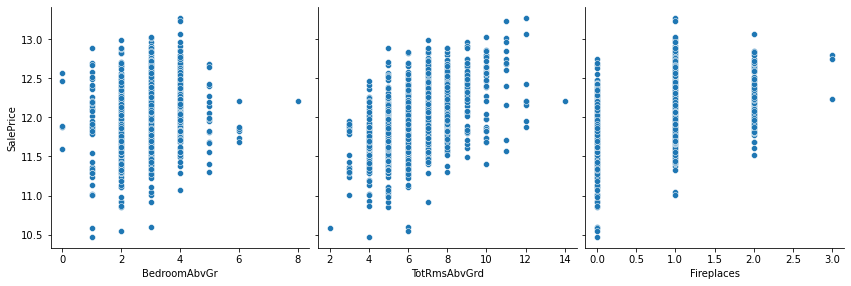

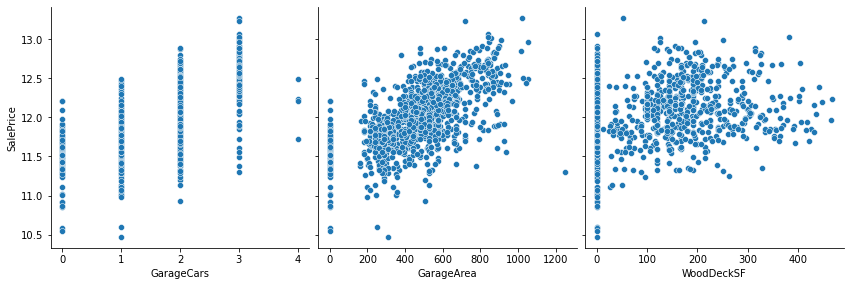

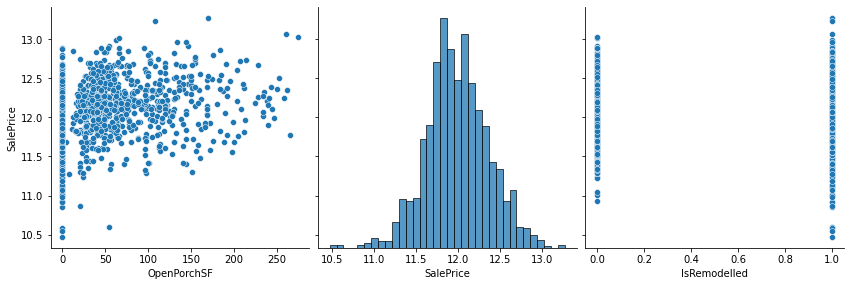

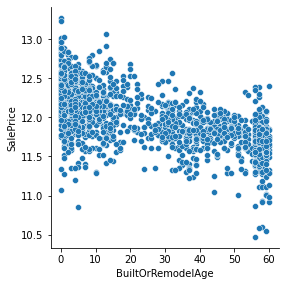

In [33]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

Observations :

- 1stFlrSF, GrLivArea seems to be showing correlation towards right
- Rest of the variables are too scattered and hence can be understood during further analysis

/home/tarun/anaconda3/envs/tarun/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


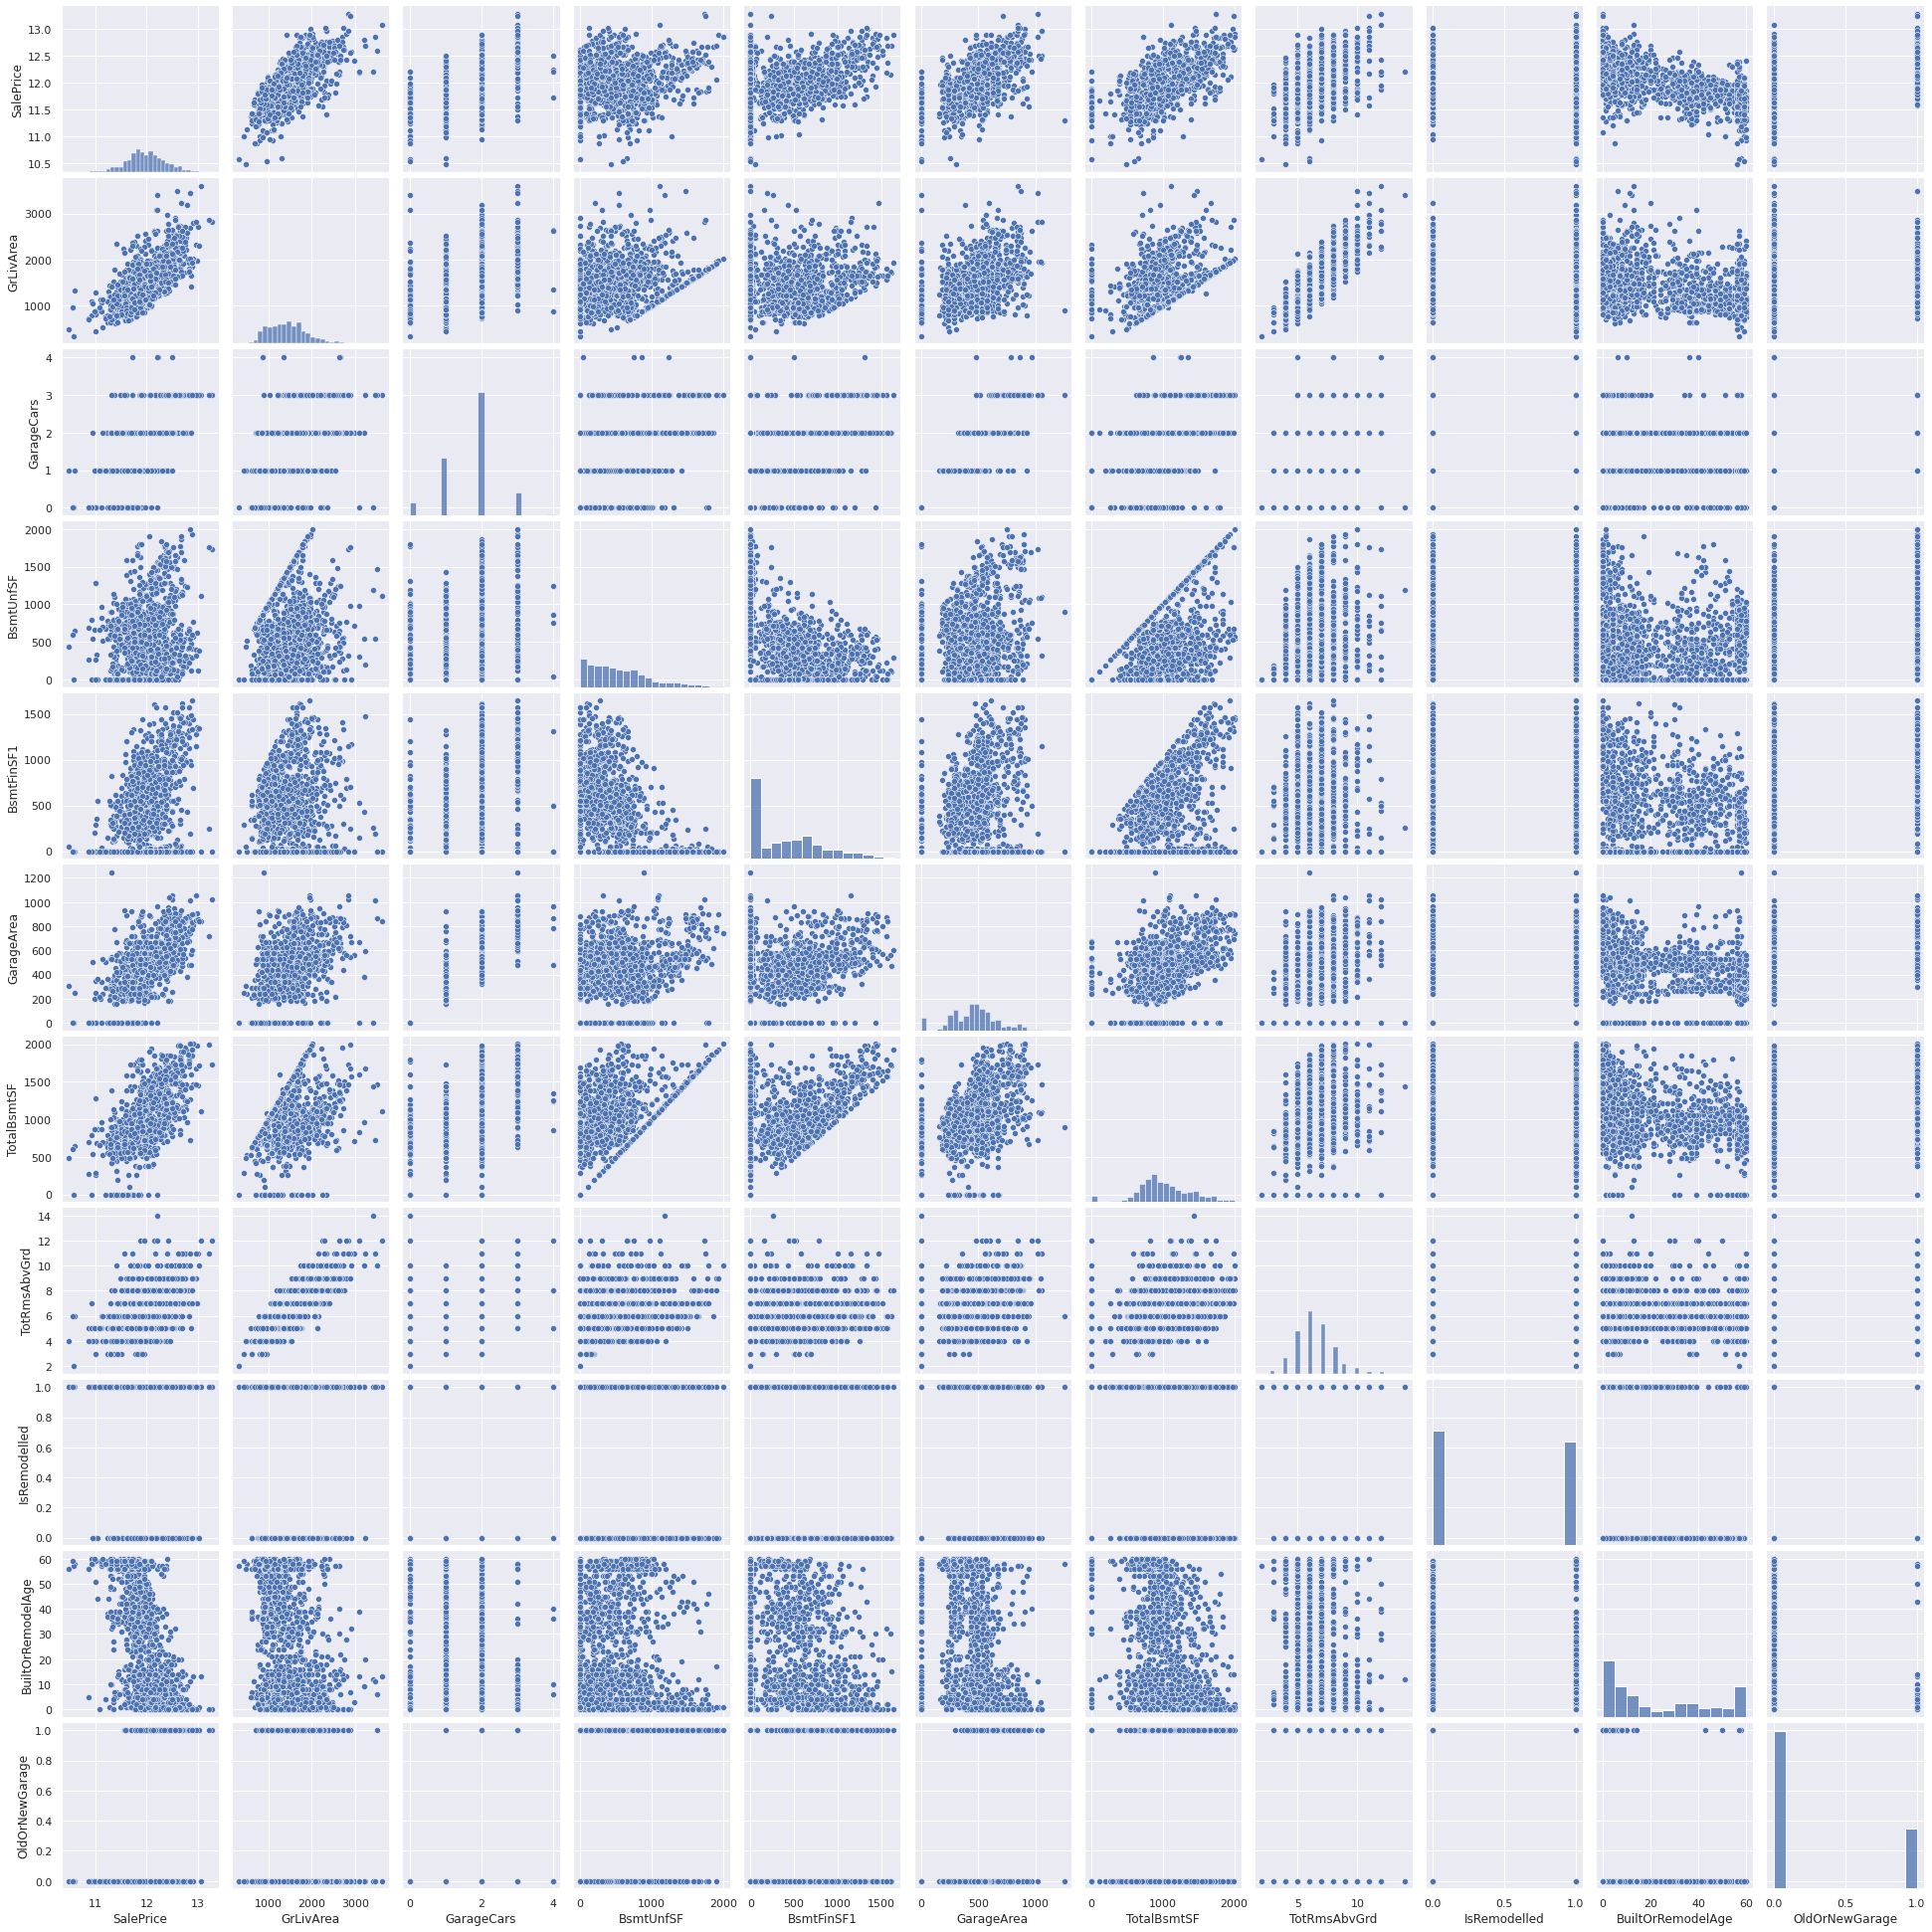

In [34]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd','IsRemodelled', 'BuiltOrRemodelAge', 'OldOrNewGarage']
sns.pairplot(df[cols], size = 2.5)
plt.show()

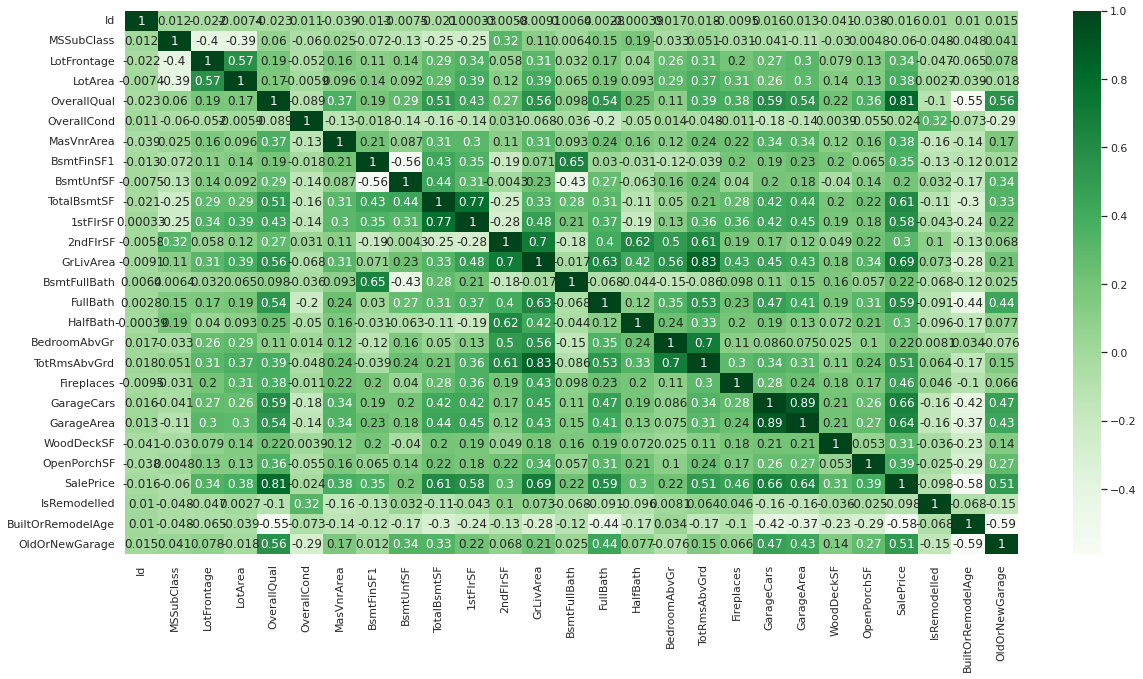

In [35]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap="Greens")
plt.show()

Removing following columns which shows high correlation
- TotRmsAbvGrd and GrLivArea show 82%
- Garage Area and Garage Cars show 88%

Hence dropping TotRmsAbvGrd and Garage Cars

In [36]:
# Removing the highly correlated variables

df.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

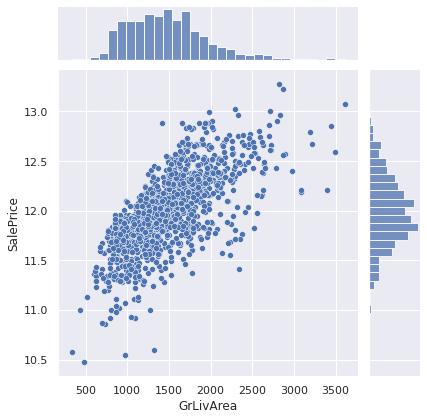

In [37]:
# Analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()

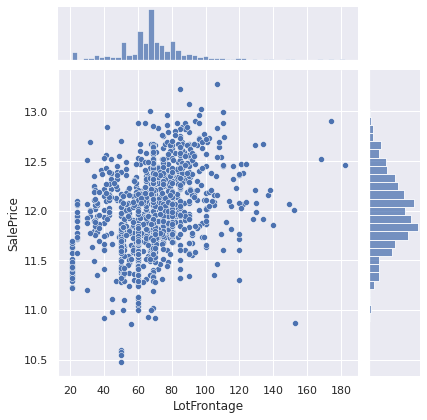

In [38]:
# Lot frontage vs SalePrice 
sns.jointplot(x = df['LotFrontage'], y = df['SalePrice'])
plt.show()

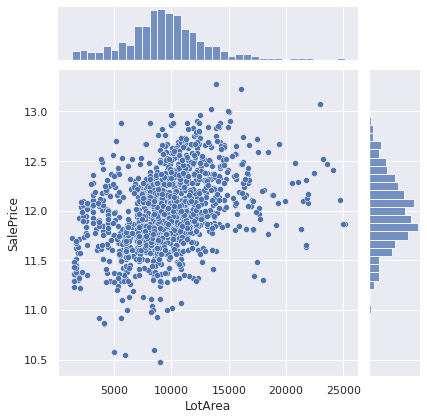

In [39]:
# LotArea vs SalePrice
sns.jointplot(x = df['LotArea'], y = df['SalePrice'])
plt.show()

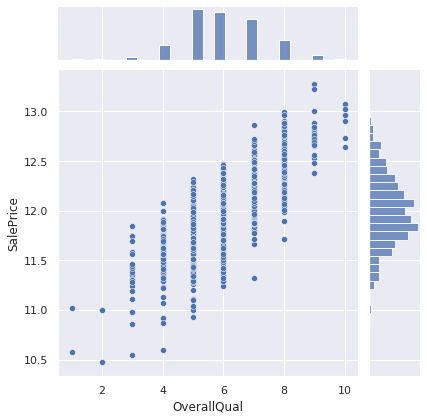

In [40]:
# OverallQual vs SalePrice
sns.jointplot(x = df['OverallQual'], y = df['SalePrice'])
plt.show()

In [41]:
# Check the shape of the dataframe
df.shape

(1358, 47)

## 3 Data Preparation


* Converting categorical data into numercal data

In [42]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

df['d_LotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df['d_ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['d_BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['d_BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
df['d_HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
df['d_BldgType'] = df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
df['d_HouseStyle'] = df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
df['d_Fence'] = df['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
df['d_LotConfig'] = df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
df['d_MasVnrType'] = df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
df['d_SaleCondition'] = df['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [43]:
# drop the old columns from which the new columns were derived
# We can also drop the id column as it will not be used any more

df = df.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


* Creating Dummies variable

In [44]:
# For the following columns create dummies

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(df['MSZoning'], prefix='MSZoning', drop_first = True)
df = pd.concat([df, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood', drop_first = True)
df = pd.concat([df, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(df['RoofStyle'], prefix='RoofStyle', drop_first = True)
df = pd.concat([df, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(df['Exterior1st'], prefix='Exterior1st', drop_first = True)
df = pd.concat([df, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(df['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
df = pd.concat([df, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(df['Foundation'], prefix='Foundation', drop_first = True)
df = pd.concat([df, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(df['GarageType'], prefix='GarageType', drop_first = True)
df = pd.concat([df, d_GarageType], axis = 1)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [45]:
# drop the below columns as we now have new columns derived from these columns

df = df.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 553.5 KB


All columns in the data set are now numeric !!!

## 4 Train Test Split

In [47]:
# Putting all feature variable to X
X = df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [48]:
# Putting response variable to y

y = df['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [49]:
# scaling the features, storing column names in cols
# scaling (the dataframe is converted to a numpy array)
std_scaler = StandardScaler()
cols = X.columns
df_scaled = std_scaler.fit_transform(X.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=cols)
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()


Scaled Dataset Using StandardScaler


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,0.067234,-0.194211,-0.272474,0.740183,-0.526853,0.836649,0.707340,-0.950680,-0.428337,-0.798154,...,1.142630,-0.134131,-0.060791,-0.047053,0.840256,-0.119121,-0.245172,-0.08168,-0.616507,-0.24853
1,-0.878923,0.578157,0.045661,-0.017863,2.149454,-0.625900,1.370251,-0.638366,0.646811,0.395671,...,-0.875174,-0.134131,-0.060791,-0.047053,0.840256,-0.119121,-0.245172,-0.08168,-0.616507,-0.24853
2,0.067234,-0.039737,0.502115,0.740183,-0.526853,0.582942,0.171162,-0.288761,-0.258855,-0.609965,...,1.142630,-0.134131,-0.060791,-0.047053,0.840256,-0.119121,-0.245172,-0.08168,-0.616507,-0.24853
3,0.303774,-0.451667,0.031829,0.740183,-0.526853,-0.625900,-0.486874,-0.041707,-0.693151,-0.489406,...,-0.875174,-0.134131,-0.060791,-0.047053,-1.190113,-0.119121,-0.245172,-0.08168,1.622041,-0.24853
4,0.067234,0.784122,1.334799,1.498229,-0.526853,1.985796,0.583044,-0.158242,0.336977,0.051638,...,1.142630,-0.134131,-0.060791,-0.047053,0.840256,-0.119121,-0.245172,-0.08168,-0.616507,-0.24853


In [50]:
# split into train and test

np.random.seed(0)
train_x, test_x, train_y, test_y = tts(X, y, train_size=0.8, test_size = 0.2, random_state=42)

## 5 Recursive feature elimination (RFE)
Since there are around 111 features, we will use RFE to get the best 50 features out of the 111 features and use the new
features for further analysis

In [51]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(train_x, train_y)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(train_x, train_y)

In [52]:
# These are the top 50 best features which incresing model accuracy 
list(train_x.columns[rfe.support_])

['OverallQual',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'Fireplaces',
 'GarageCars',
 'd_BsmtQual',
 'd_KitchenQual',
 'd_SaleCondition',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_MeadowV',
 'Neighborhood_NPkVill',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'RoofStyle_Shed',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_MetalSd',
 'Exterior1st_Stone',
 'Exterior1st_Stucco',
 'Exterior1st_WdShing',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CmentBd',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_Wd Shng',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'GarageType_Attchd',
 'GarageType_Basmen

In [53]:
# Assign the columns selected by RFE to cols

col = train_x.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(train_x.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,OverallQual,True,1
1,BsmtFullBath,True,1
2,FullBath,True,1
3,HalfBath,True,1
4,Fireplaces,True,1
5,GarageCars,True,1
6,d_BsmtQual,True,1
7,d_KitchenQual,True,1
8,d_SaleCondition,True,1
9,MSZoning_FV,True,1


In [54]:
# Assign the 50 columns to X_train_rfe
train_x_rfe = train_x[col]

In [55]:
train_x_rfe

,OverallQual,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageCars,d_BsmtQual,d_KitchenQual,d_SaleCondition,MSZoning_FV,...,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_None
932,9,0,2,0,1,3,5,5,1,0,...,0,1,0,0,0,1,0,0,0,0
1385,4,1,1,0,0,1,3,4,1,0,...,0,0,0,0,0,0,0,0,1,0
421,6,0,2,0,1,2,4,4,1,0,...,1,0,0,0,0,1,0,0,0,0
786,5,1,2,0,0,1,2,3,1,0,...,0,1,0,0,0,0,0,0,1,0
56,8,1,2,1,0,2,4,4,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,7,0,2,1,0,2,4,4,1,1,...,0,1,0,0,0,0,0,0,1,0
1213,4,1,0,0,0,1,3,3,1,0,...,1,0,0,0,0,1,0,0,0,0
1391,5,0,2,0,0,3,3,3,1,0,...,1,0,0,0,0,0,0,0,1,0
927,7,0,2,1,1,2,3,3,1,0,...,1,0,0,0,0,1,0,0,0,0


## 6. Ridge regression 
    Have to find the coefficients of multiple-regression models in scenarios where linearly independent variables are highly correlated

In [56]:
# list of alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(train_x, train_y) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [57]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


,param_alpha,mean_train_score,mean_test_score,rank_test_score
19,8.0,-0.077393,-0.084732,1
18,7.0,-0.077179,-0.084733,2
20,9.0,-0.077593,-0.084739,3
17,6.0,-0.076953,-0.084750,4
21,10.0,-0.077776,-0.084762,5
16,5.0,-0.076706,-0.084790,6
15,4.0,-0.076418,-0.084864,7
14,3.0,-0.076076,-0.084989,8
22,20,-0.079132,-0.085087,9
13,2.0,-0.075651,-0.085204,10


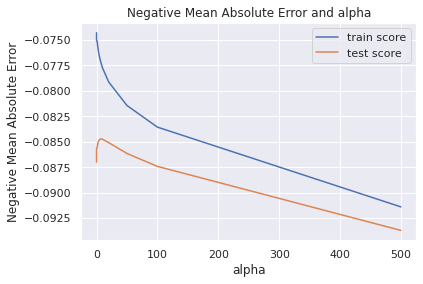

In [58]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [59]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=8.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [60]:
# check the coefficient values with lambda = 10

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(train_x, train_y)
ridge.coef_

array([-3.01097389e-04,  1.14759459e-04,  5.71746728e-06,  5.47104994e-02,
        4.14648901e-02,  2.58904105e-05,  6.32489898e-05, -8.71111016e-06,
        1.17210503e-04,  5.71815984e-05,  3.25158059e-05,  1.80965407e-04,
        2.14650284e-02,  2.56807054e-02,  3.83877766e-02, -1.47520660e-03,
        1.06806820e-02,  3.93392511e-02,  1.04136301e-04,  1.12036284e-04,
       -2.78394100e-02, -1.02536178e-03,  3.05873830e-02, -8.54353317e-04,
        1.48835473e-02,  1.18615961e-02,  1.28969163e-02,  3.86347082e-03,
        1.40375396e-02,  1.80750881e-02,  8.45769436e-03,  9.78838319e-03,
       -6.39584710e-03,  3.90548338e-03,  1.17910217e-03, -2.68451262e-04,
        3.21403420e-03,  4.97278696e-02,  6.06946198e-02,  1.80636435e-02,
        5.88006648e-02,  1.43516785e-02, -1.95643880e-03, -1.73463760e-02,
        5.95877511e-03,  8.31399605e-03, -2.97854088e-03,  9.49112360e-02,
       -4.41334872e-02, -2.07527176e-02, -5.08425139e-02, -4.91905470e-02,
       -1.51957981e-02, -

In [61]:
# Check the mean squared error

mean_squared_error(test_y, ridge.predict(test_x))

0.013263610655145502

In [62]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':train_x.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0003
1,LotFrontage,0.0001
2,LotArea,0.0000
3,OverallQual,0.0547
4,OverallCond,0.0415
...,...,...
106,GarageType_Basment,-0.0010
107,GarageType_BuiltIn,0.0298
108,GarageType_CarPort,-0.0433
109,GarageType_Detchd,0.0104


In [63]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = train_x.columns))
ridge_coeff_dict

{'MSSubClass': -0.0003,
 'LotFrontage': 0.0001,
 'LotArea': 0.0,
 'OverallQual': 0.0547,
 'OverallCond': 0.0415,
 'MasVnrArea': 0.0,
 'BsmtFinSF1': 0.0001,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 0.0001,
 '1stFlrSF': 0.0001,
 '2ndFlrSF': 0.0,
 'GrLivArea': 0.0002,
 'BsmtFullBath': 0.0215,
 'FullBath': 0.0257,
 'HalfBath': 0.0384,
 'BedroomAbvGr': -0.0015,
 'Fireplaces': 0.0107,
 'GarageCars': 0.0393,
 'WoodDeckSF': 0.0001,
 'OpenPorchSF': 0.0001,
 'IsRemodelled': -0.0278,
 'BuiltOrRemodelAge': -0.001,
 'OldOrNewGarage': 0.0306,
 'd_LotShape': -0.0009,
 'd_ExterQual': 0.0149,
 'd_BsmtQual': 0.0119,
 'd_BsmtExposure': 0.0129,
 'd_BsmtFinType1': 0.0039,
 'd_HeatingQC': 0.014,
 'd_KitchenQual': 0.0181,
 'd_FireplaceQu': 0.0085,
 'd_GarageFinish': 0.0098,
 'd_BldgType': -0.0064,
 'd_HouseStyle': 0.0039,
 'd_Fence': 0.0012,
 'd_LotConfig': -0.0003,
 'd_MasVnrType': 0.0032,
 'd_SaleCondition': 0.0497,
 'MSZoning_FV': 0.0607,
 'MSZoning_RH': 0.0181,
 'MSZoning_RL': 0.0588,
 'MSZoning_RM': 0.0144,


* Recursive feature elimination for 15 features


In [64]:
# Do an RFE to minimise the features to 15
train_x_ridge = train_x[ridge_df.Features]

lm = LinearRegression()
lm.fit(train_x_ridge, train_y)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(train_x_ridge, train_y)

In [65]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( train_x_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
7,Neighborhood_Crawfor,True,1,0.0949
10,Neighborhood_NridgHt,True,1,0.0619
1,MSZoning_FV,True,1,0.0607
3,MSZoning_RL,True,1,0.0588
0,OverallQual,True,1,0.0547
8,Neighborhood_NPkVill,True,1,0.0263
14,Foundation_Stone,True,1,0.0202
2,MSZoning_RH,True,1,0.0181
4,MSZoning_RM,True,1,0.0144
6,Neighborhood_ClearCr,True,1,0.0083


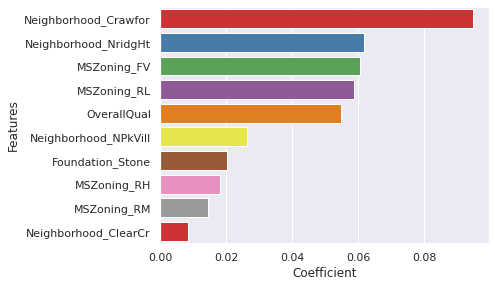

In [66]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

## 7. Lasso regression 
    finding best fit features for model
    

In [67]:
lasso = Lasso()
# list of alphas
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(train_x, train_y) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/tarun/anaconda3/envs/tarun/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2034114617342855, tolerance: 0.011904605215644333
  model = cd_fast.enet_coordinate_descent(
/home/tarun/anaconda3/envs/tarun/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7125075235983154, tolerance: 0.012366813954314257
  model = cd_fast.enet_coordinate_descent(
/home/tarun/anaconda3/envs/tarun/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6393328539120775, tolerance: 0.012292446854240404
  mod

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [68]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.0002,-0.076021,-0.085282,1
2,0.0003,-0.077006,-0.085501,2
3,0.0004,-0.077843,-0.085507,3
4,0.0005,-0.078426,-0.085521,4
0,0.0001,-0.075195,-0.085640,5
5,0.001,-0.080636,-0.085725,6
6,0.002,-0.083445,-0.087473,7
7,0.003,-0.085553,-0.088970,8
8,0.004,-0.087252,-0.090358,9
9,0.005,-0.088472,-0.091339,10


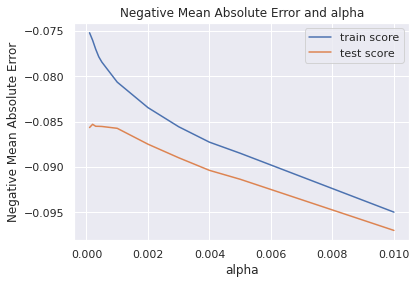

In [69]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [70]:
# get the best estimator for lambda
lasso_model_cv.best_estimator_

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [71]:

# check the coefficient values with lambda = 0.0004

alpha = 0.0004

lasso = Lasso(alpha=alpha)
        
lasso.fit(train_x, train_y) 
lasso.coef_

array([-3.21427626e-04,  1.28433940e-04,  5.54471459e-06,  5.57616963e-02,
        4.17365366e-02,  3.76036629e-05,  6.41452967e-05, -8.92703826e-06,
        1.18336843e-04,  5.60826494e-05,  3.41867592e-05,  1.79593029e-04,
        1.89124936e-02,  2.09135342e-02,  3.51500677e-02, -0.00000000e+00,
        7.11274331e-03,  4.29288185e-02,  1.08041744e-04,  1.23597594e-04,
       -2.65075864e-02, -1.01866317e-03,  2.71334717e-02, -0.00000000e+00,
        1.33648432e-02,  1.01609413e-02,  1.29511612e-02,  3.91196015e-03,
        1.39446093e-02,  1.65682126e-02,  9.24674038e-03,  1.12245827e-02,
       -6.06305326e-03,  3.63989060e-03,  4.97532586e-04, -2.45717008e-04,
        0.00000000e+00,  5.25486693e-02,  8.12976835e-02,  0.00000000e+00,
        5.39307331e-02,  9.00499190e-03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.10904697e-01,
       -4.38607906e-02, -1.09066984e-02, -5.77756310e-02, -5.17472255e-02,
       -5.60196996e-03,  

In [72]:
# Check the mean squared error

mean_squared_error(test_y, lasso.predict(test_x))

0.01313556900160606

In [73]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':train_x.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0003
1,LotFrontage,0.0001
2,OverallQual,0.0558
3,OverallCond,0.0417
4,BsmtFinSF1,0.0001
...,...,...
58,Foundation_Slab,0.0477
59,GarageType_Attchd,0.0119
60,GarageType_BuiltIn,0.0143
61,GarageType_CarPort,-0.0480


In [74]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = train_x.columns))
lasso_coeff_dict

{'MSSubClass': -0.00032142762559808337,
 'LotFrontage': 0.00012843393979573023,
 'LotArea': 5.54471458524395e-06,
 'OverallQual': 0.05576169629434064,
 'OverallCond': 0.041736536644874755,
 'MasVnrArea': 3.760366294880904e-05,
 'BsmtFinSF1': 6.41452967284512e-05,
 'BsmtUnfSF': -8.927038261158528e-06,
 'TotalBsmtSF': 0.00011833684305086665,
 '1stFlrSF': 5.608264940893392e-05,
 '2ndFlrSF': 3.4186759158112276e-05,
 'GrLivArea': 0.0001795930285116859,
 'BsmtFullBath': 0.01891249359612176,
 'FullBath': 0.020913534209760987,
 'HalfBath': 0.03515006768259022,
 'BedroomAbvGr': -0.0,
 'Fireplaces': 0.007112743307393132,
 'GarageCars': 0.04292881847790468,
 'WoodDeckSF': 0.00010804174397327602,
 'OpenPorchSF': 0.00012359759387136417,
 'IsRemodelled': -0.026507586365260735,
 'BuiltOrRemodelAge': -0.0010186631699423416,
 'OldOrNewGarage': 0.02713347167962518,
 'd_LotShape': -0.0,
 'd_ExterQual': 0.013364843172936491,
 'd_BsmtQual': 0.01016094129649836,
 'd_BsmtExposure': 0.012951161162804932,
 'd_

* Recursive feature elimination for 15 features

In [75]:
# Do an RFE to minimise the features to 15

train_x_lasso = train_x[lasso_df.Features]

lm = LinearRegression()
lm.fit(train_x_lasso, train_y)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(train_x_lasso, train_y)

In [76]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip(train_x_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
7,Neighborhood_Crawfor,True,1,0.110905
12,Neighborhood_StoneBr,True,1,0.093710
11,Neighborhood_NridgHt,True,1,0.069449
0,OverallQual,True,1,0.055762
6,MSZoning_RL,True,1,0.053931
4,GarageCars,True,1,0.042929
3,HalfBath,True,1,0.035150
2,FullBath,True,1,0.020914
1,BsmtFullBath,True,1,0.018912
5,d_KitchenQual,True,1,0.016568


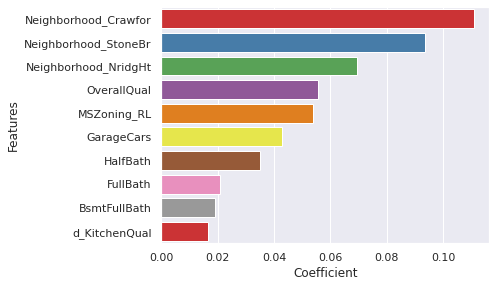

In [77]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.

## Conclusion :
* The optimal lambda value in case of Ridge and Lasso is as below:

    * Ridge - 10
    * Lasso - 0.0004
* The Mean Squared error in case of Ridge and Lasso are:

    * Ridge - 0.013743
    * Lasso - 0.013556
* The Mean Squared Error of Lasso is slightly lower than that of Ridge

* Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

* Hence based on Lasso, the factors that generally affect the price are the Zoning classification, Living area square feet, Overall quality and condition of the house, Foundation type of the house, Number of cars that can be accomodated in the garage, Total basement area in square feet and the Basement finished square feet area

Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.